<a href="https://colab.research.google.com/github/heitor-eng/H_data_science/blob/master/Estudo_de_dados_sobre_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro

É nítido que a violência no Brasil é algo preocupante, crescente e que veem ganhando destaque nos noticiários, e em busca de entender um pouco mais sobre essa situação, o projeto presente tráz um esboço de como analisar os dados da violência em uma das capitais mais lindas do Brasil, mas que sofre bastante a violência.  

## Obtenção dos Dados

Este trabalho utilizou os dados disponíveis no portal ISPdados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

## Importando Dados

In [ ]:
# Importar pacotes necessários
import pandas as pd
import numpy as np


# Importar arquivo csv
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise Inicial dos Dados

Um dos primeiros procedimentos de um projeto de *data science*,  é  o entendimento sobre as dimensões do DataFrame trabalhado, ou seja, identicar a quantidade de variáveis (colunas) e entradas (linhas) que existem no *dataset*.

In [ ]:
# Identificar o tamanho do DataFrame
print("Variáveis: ",df.shape[1])
print("Entradas: ",df.shape[0])

Variáveis:  56
Entradas:  344


Sabendo o número de variáveis e entradas que se encontram no DataFrame, agora é importante descobrir quais são as variávies que existem no DataFrame.

In [ ]:
# Nome das variáveis
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Com o conhecimento sobre o tamanho do DataFrame, agora é necessário descobrir quais são os tipos de variáveis que existem no dataset. 
Esse é um procedimento importante para ajudar na limpeza dos dados.

In [ ]:
# Verificar o tipo de cada variável
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Um ponto interessante de destacar é que as variávies apresentadas no dataset são do tipo numérico, ou seja, `int` e `float`

Após esses procedimentos, agora é o momento de verificar como está estruturado do *DataFrame* e isso é feito através da visualização das 5 primeiras entradas.

In [ ]:
# Ver as 5 primeiras entradas do dataset
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Com essas 5 etapas feitas, é agora que começa o trabalho de análise do DataFrame e aqui a gente já pode destacar alguns pontos interessantes sobre os dados encontrados. Como por exemplo:

* Os dados são obtidos dede de 1991 e isso não quer dizer que é algo bom ou confiável, pois a política de dados é muito mais recente do que quando começou a ser computado as informações fornecidas pelo dataset, tanto que isso gera a segunda observação.

* Dados ausentes ou nulo atrapalham no entendimento do trabalho, pois vai parecer que uma ação não existe ou não acontece e isso produz resultados falsos. Por isso que temos que utilizar ferramentas de análise estatística quando se quer trabalhar na área de *data science*

Antes de decidir o que fazer com os dados ausentes, primeiro é necessário verificar a quantidade em porcentagem, dos dados ausentes em cada variável.

In [ ]:
# Ver os valores faltantes das colunas

(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

O resultado obitdo acima, informa a proporção de dados faltantes em cada coluna, do maior para o menor e com isso a gente consegue saber quais variáveis precisam ser trabalhadas, por exemplo a coluna de roubo de bicicleta e as que envolvem drogas.

E uma forma de trabalhar para concertar essa falta de dados através do uso da informação de data de início, em que os casos começaram a ser registrados.

Além disso, existem outras formas de encararmos e explorarmos os dados, como por exemplo:

* Números anuais por crime.
* Números mensais por crime.
* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.)



## Informações Estatísticas da Violência no Rio de Janeiro

Com o uso do  método `describe()`, é possível visualizar a distribuição estatística do dataframe.

Utilizando esse método, a gente consegue informações que devem nos ajudar na estruturação e trabalho dos dados, como por exemplo:

* Identificar outliers;
* Entender melhor a distribuição dos dados;
* Identificar falhas na distribuição dos dados;
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.

In [ ]:
# Imprimir o resultado estatistíco do dataframe
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Crimes Contra o Patrimônio - Veículos

Nesta secção do trabalho vou dar destaque para os problemas relacionados com os crimes e furtos em automóveis.

Um dos motivos é porque não temos dados nulos ou ausentes para esse tipo de problema, como foi mostrado na etapa de encontrar *valores nulos ou ausentes*.


In [ ]:
# Ver a média da variável roubo de veículos
mean_roubo_veiculo = df.roubo_veiculo.mean()
print(round(mean_roubo_veiculo,2))

2448.7


No passo de número 13 é feito a linha de código que calcula a média de roubos de veículos, resultando na média de aproximadamente 2449 roubos de carros.

In [ ]:
# Ver a média variável do furto de veículos
mean_furto_veiculo = df.furto_veiculos.mean()
print(round(mean_furto_veiculo,2))

1674.67


Na célula de número 18, foi calculado a média de casos registrados de furtos de veículos, o que é  interessante notar que é menor do que o roubo de veículos, porém ainda é bem alto e preocupante para ambos os casos, que exitam uma média tão alta para crimes relacionados com o transporte.

In [ ]:
# Ver a média da variável de recuperação dos veículos
mean_recuperacao_veiculo = df.recuperacao_veiculos.mean()

# Total de veículos perdidos
total = mean_roubo_veiculo + mean_furto_veiculo
print("Méida de veículos perdidos por mês: {:.2f}".format(total))
print("Média de veículos recuperados por mês: {:.2f}".format(mean_recuperacao_veiculo))

# Porcentagem de veículos recuperados
pct = (mean_recuperacao_veiculo/total)*100

print("{:.2f}% dos veículos furtados ou roubados são recuperados. ".format(pct))

Méida de veículos perdidos por mês: 4123.37
Média de veículos recuperados por mês: 1772.24
42.98% dos veículos furtados ou roubados são recuperados. 


### Crimes contra a vida

Abaixo, vamos identificar qual foi o máximo e mínimo registrado para a variável `hom_doloso` ao longo do período observado no dataset.

In [ ]:
# Valor mínimo para a variável hom_doloso
min_hom_doloso = df.hom_doloso.min()
print("O valor mínimo de homicidios dolosos registrados no dataframe foi de: {}".format(min_hom_doloso))

# Valor máximo para a variável hom_doloso
max_homo_doloso = df.hom_doloso.max()
print("A quantidade máxima de crimes dolosos já registrado foi de {}".format(max_homo_doloso))

O valor mínimo de homicidios dolosos registrados no dataframe foi de: 272
A quantidade máxima de crimes dolosos já registrado foi de 831


Como os dados registrados para a máxima e a mínima  de registros para o homicídios dolosos são de se assustar, vou investigar um pouco mais afundo sobre esse problema.

In [ ]:
# Verificando o mês com o menor número de crimes de homicídios dolosos
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [ ]:
# Mês com o maior número de crimes de homicídios dolosos
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Analisando os resultados é perceptivel que provavelmente houve uma melhora na situação desse tipo de problema, pois esse crime teve seu valor máximo em 1995 e agora o menor número de crimes relacionados a homícidios dolosos foi em 2015. 

Isso préviamente pode indicar que isso está diminuindo, entretanto só um estudo mais profundo que irá nos trazer a resposta definitiva.

## Visualização dos Dados



Histogramas são poderosas ferramentas de visualização, que nos auxiliam a entender a distribuição dos valores em uma variável.

Abaixo, faremos essa análise em relação à variável `hom_doloso`.




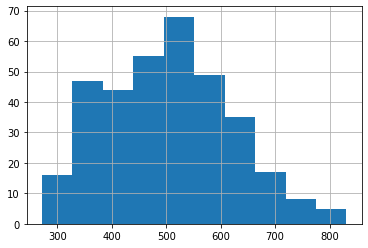

In [ ]:
df.hom_doloso.hist()

Algumas análises que o histograma tráz:

* O gráfico se assemelha a uma gaussiana, demonstrando que em 70 meses os casos de homicídios dolosos foram entre 500 e 550;

* Em menos de 10 meses houveram casos acima de 800 crimes desse gênero;

* 

Por último vou analisar a variável `roubo_em_coletivo` utilizando um gráfico de linhas.

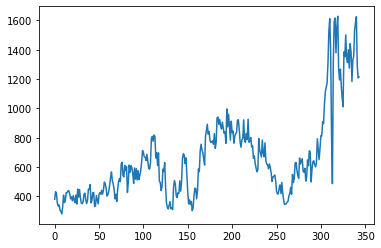

In [ ]:
df.roubo_em_coletivo.plot()

## Conclusão

Neste projeto, a ideia era aprender a trabalhar com um *dataframe* em que houvesse dados nulos ou ausentes e de que maneira trabalhar/lidar com um dataframe complicado, pois a falta de dados é o que mais atrabapalha na hora de criar uma análise apurada sobre o problema/situação.

E aqui foi apresentado algumas ideias de que caminhos proceder para entender o dataframe e o que fazer quando for trabalhar com um dataset cheio de valores vazios ou nulos.
